In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

In [2]:
#Create dataframe and keep columns required for data analysis
log_df=pd.read_csv('medical_clean.csv', usecols=['Income', 'Gender', 'Age', 'VitD_levels', 'HighBlood', 'Stroke','Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'TotalCharge', 'Additional_charges'])

In [3]:

log_df

,Age,Income,Gender,VitD_levels,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,TotalCharge,Additional_charges
0,53,86575.93,Male,19.141466,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,3726.702860,17939.403420
1,51,46805.99,Female,18.940352,Yes,No,Yes,No,No,No,No,No,No,Yes,No,4193.190458,17612.998120
2,53,14370.14,Female,18.057507,Yes,No,Yes,No,Yes,No,No,No,No,No,No,2434.234222,17505.192460
3,78,39741.49,Male,16.576858,No,Yes,No,Yes,No,No,No,No,No,Yes,Yes,2127.830423,12993.437350
4,22,1209.56,Female,17.439069,No,No,No,No,No,Yes,No,No,Yes,No,No,2113.073274,3716.525786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25,45967.61,Male,16.980860,Yes,No,No,No,No,No,No,Yes,No,Yes,No,6850.942000,8927.642000
9996,87,14983.02,Male,18.177020,Yes,No,Yes,Yes,Yes,No,No,No,No,No,Yes,7741.690000,28507.150000
9997,45,65917.81,Female,17.129070,Yes,No,Yes,No,No,No,No,Yes,Yes,No,No,8276.481000,15281.210000
9998,43,29702.32,Male,19.910430,No,No,Yes,No,No,No,Yes,No,No,No,No,7644.483000,7781.678000


In [4]:
#Display column names
print(log_df.columns)

Index(['Age', 'Income', 'Gender', 'VitD_levels', 'HighBlood', 'Stroke',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'TotalCharge', 'Additional_charges'],
      dtype='object')


In [5]:
log_df.shape

(10000, 17)

In [6]:
#Check for missing data
log_df.isnull().sum()

Age                   0
Income                0
Gender                0
VitD_levels           0
HighBlood             0
Stroke                0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
TotalCharge           0
Additional_charges    0
dtype: int64

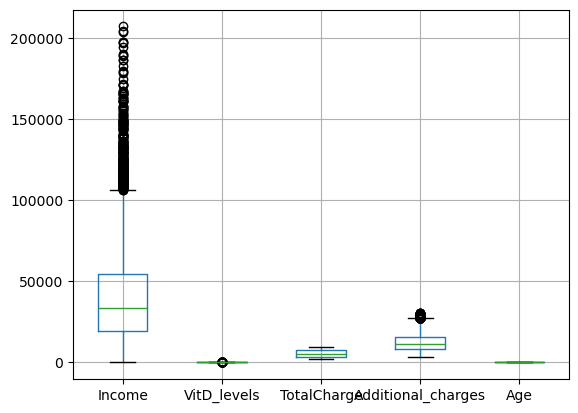

In [7]:
#Univariate statistics for continuous data
#Identify outliers for Income Vitamin D levels, Total and Additional charges
log_df[['Income', 'VitD_levels', 'TotalCharge', 'Additional_charges', 'Age']].boxplot()
plt.show()

In [8]:
#Let's view the values for income
log_df['Income'].describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

Calculate the Interquarantile Range (IQR) IQR= 75th - 25th percentile IQR =  54296.402500- 19598.775000 = 34697.627499999995

Lower bound = 25th percentile - 1.5 * IQ
R Upper bound = 75th percentile + 1.5 * IQR

Calculate the boun
ds: Lower Bou19598.775000 - 1.5 * 34697.627499999995 = -32447.666249999987
.80 Upper Bou54296.402500 + 1.5 * 34697.627499999995 = 106342.84374999999

- **Potential Outliers**: The maximum income value of 207249.100000 is far above the upper bound of 106342.84374999999, indicating potential outliers on the higher end of the income distribution.2.77

In [10]:
#mitigate the outlier for Income column
# Check for any unexpected tuple-like entries, should return 0 if there are no tuple like rows
log_df['Income'].apply(lambda x: isinstance(x, tuple)).sum()

0

In [11]:
upper_cap_medical = 106342.84
print(type(upper_cap_medical))

<class 'float'>


In [12]:

# Apply the cap
log_df['Income'] = log_df['Income'].apply(lambda x: min(x, upper_cap_medical))
print(log_df['Income'].max()) 


106342.84


In [13]:
print(log_df['Income'].max()) 

106342.84


In [14]:
log_df.Income = log_df.Income.round(2)

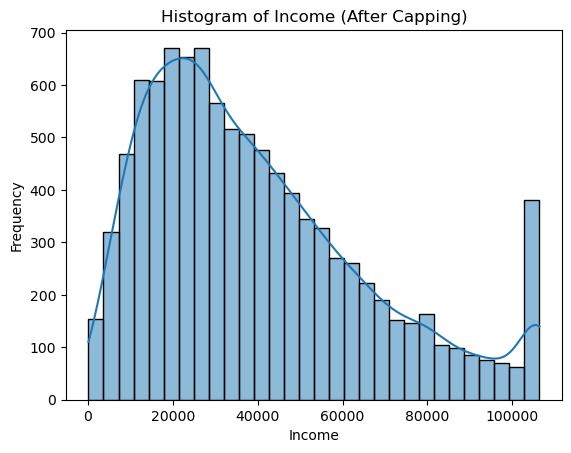

In [15]:
#Histogram for Income after capping
sns.histplot(log_df['Income'], bins=30, kde=True)

plt.title('Histogram of Income (After Capping)')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.show()

In [16]:

log_df.Income.describe()

count     10000.000000
mean      39721.119187
std       26029.788858
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      106342.840000
Name: Income, dtype: float64

In [17]:
#Let's view values for Vitamin D levels
log_df['VitD_levels']. describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [18]:
log_df.VitD_levels = log_df.VitD_levels.round(2)

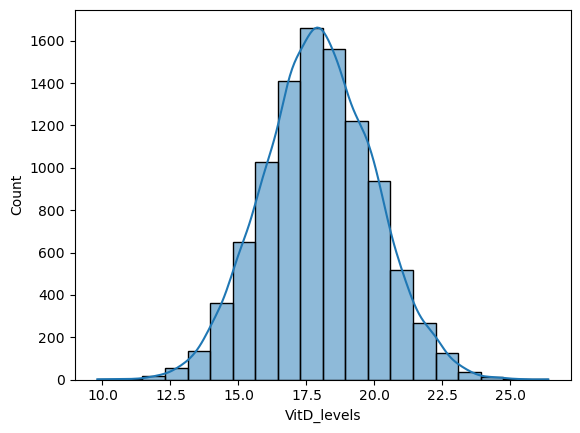

In [19]:
#Histogram for Vitamin D levels
sns.histplot(log_df['VitD_levels'], bins=20, kde=True)
plt.show()

For the Vitamin D levels, the minimum value is 9.8 and the maximum value of 26.40 seems legitimate. Thus, it will remain.

In [21]:
log_df.TotalCharge = log_df.TotalCharge.round(2)

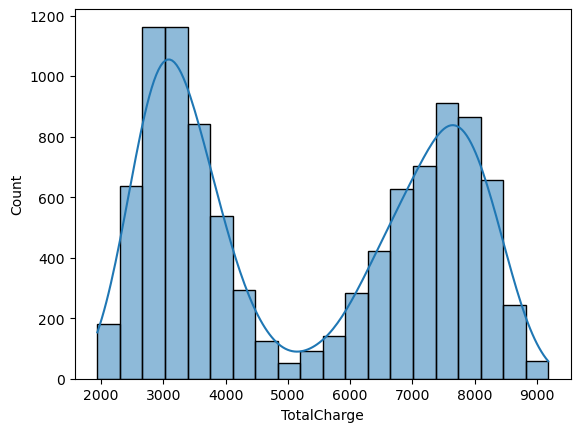

In [22]:
#Histogram to explore Total Charge
sns.histplot(log_df['TotalCharge'], bins=20, kde=True)
plt.show()

In [23]:
log_df.TotalCharge.describe()

count    10000.000000
mean      5312.172758
std       2180.393815
min       1938.310000
25%       3179.375000
50%       5213.950000
75%       7459.700000
max       9180.730000
Name: TotalCharge, dtype: float64

In [24]:
#Let's view the values for Additional charges
log_df['Additional_charges'].describe()

count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64

Calculate the Interquarantile Range (IQR) IQR= 75th - 25th percentile IQR = 15626.490000 - 7986.487755 = 7,640.00

Lower bound = 25th percentile - 1.5 * IQ 
R Upper bound = 75th percentile + 1.5 * IQR

Calculate the boun 
ds: Lowernd = -3,473.52 
.80 Uppernd = 27,086.499999

Potential Outliers: The maadditional chargesincome val30566.070000100000 is far above the upper bo  27,086.4999999, indicating potential outliers on the higher end of the income distrin.2.77

In [26]:
#mitigate the outlier for Additional charges column
# Check for any unexpected tuple-like entries, should return 0 if there are no tuple like rows
log_df['Additional_charges'].apply(lambda x: isinstance(x, tuple)).sum()

0

In [27]:
upper_cap_addc = 27086.49
print(type(upper_cap_addc))

<class 'float'>


In [28]:
# Apply the cap
log_df['Additional_charges'] = log_df['Additional_charges'].apply(lambda x: min(x, upper_cap_addc))
print(log_df['Additional_charges'].max()) 

27086.49


In [29]:
log_df.Additional_charges = log_df.Additional_charges.round(2)

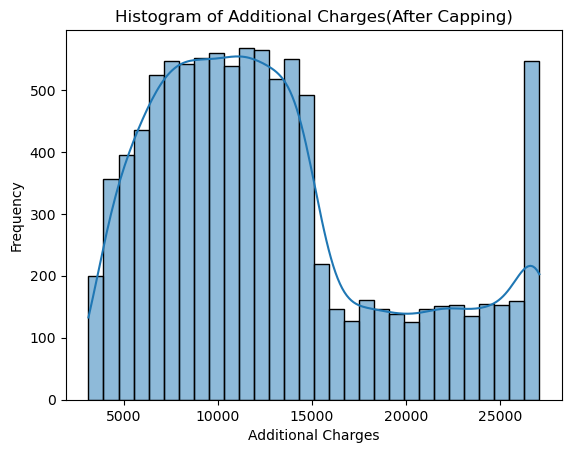

In [30]:
#Histogram after capping
sns.histplot(log_df['Additional_charges'], bins=30, kde=True)

plt.title('Histogram of Additional Charges(After Capping)')
plt.xlabel('Additional Charges')
plt.ylabel('Frequency')

plt.show()

In [31]:
log_df.Additional_charges.describe()

count    10000.000000
mean     12881.862167
std       6420.448346
min       3125.700000
25%       7986.485000
50%      11573.980000
75%      15626.490000
max      27086.490000
Name: Additional_charges, dtype: float64

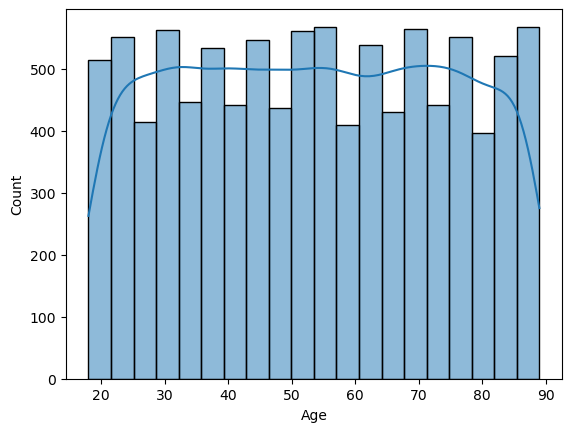

In [32]:
#Histogram for Age
sns.histplot(log_df['Age'], bins=20, kde=True)
plt.show()

In [33]:
log_df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [34]:
print(log_df.columns)

Index(['Age', 'Income', 'Gender', 'VitD_levels', 'HighBlood', 'Stroke',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'TotalCharge', 'Additional_charges'],
      dtype='object')


In [35]:
#Frequency table for Gender
pd.crosstab(index=log_df['Gender'], columns='count')

col_0,count
Gender,
Female,5018
Male,4768
Nonbinary,214


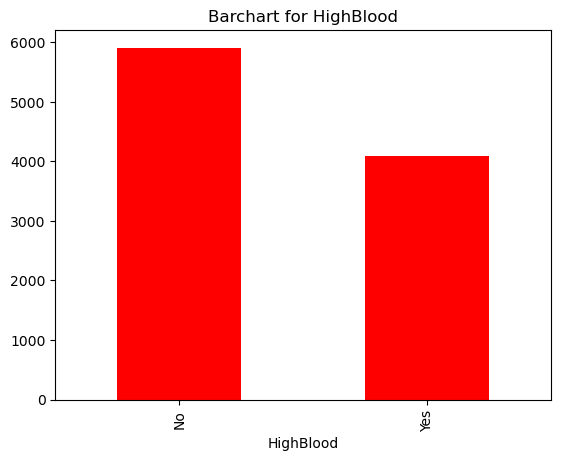

In [36]:
#Barchart for HighBlood
log_df['HighBlood'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for HighBlood")
plt.show()

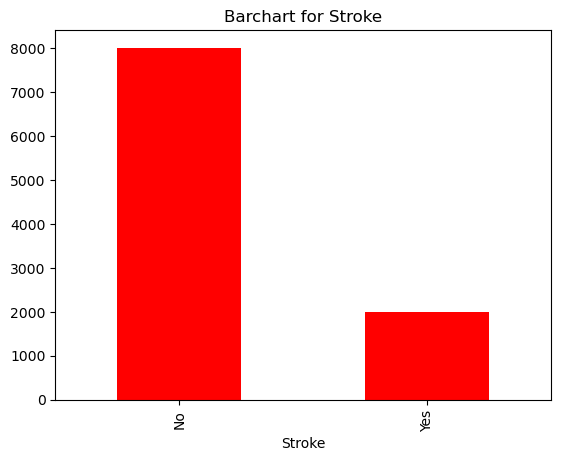

In [37]:
#Barchart for Stroke
log_df['Stroke'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for Stroke")
plt.show()

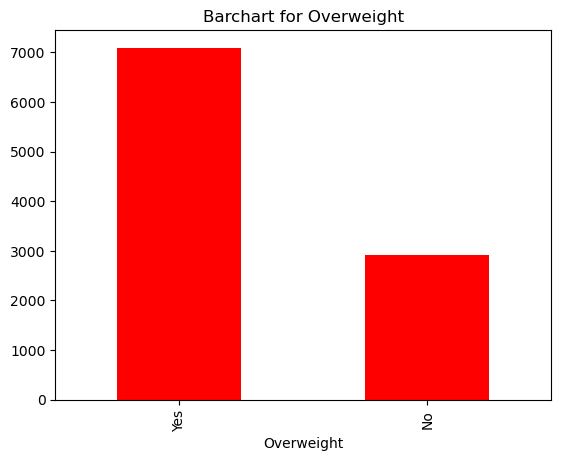

In [38]:
#Barchart for Overweight
log_df['Overweight'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for Overweight")
plt.show()

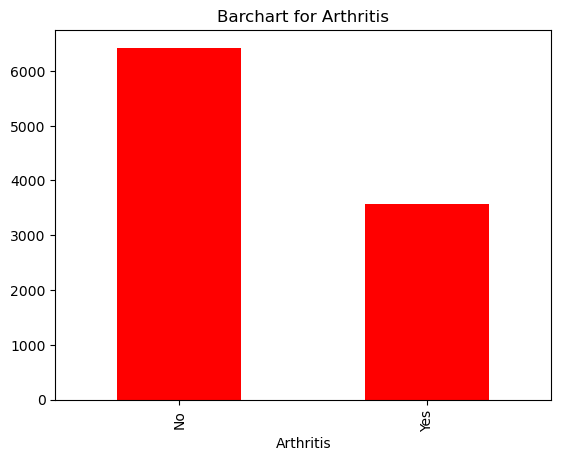

In [39]:
#Barchart for Arthritis
log_df['Arthritis'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for Arthritis")
plt.show()

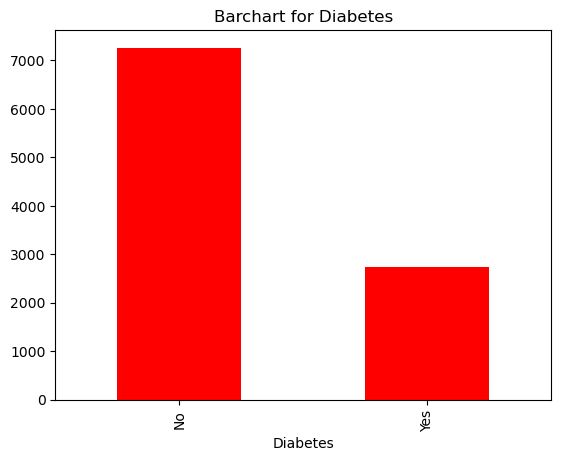

In [40]:
#Barchart for Diabetes
log_df['Diabetes'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for Diabetes")
plt.show()

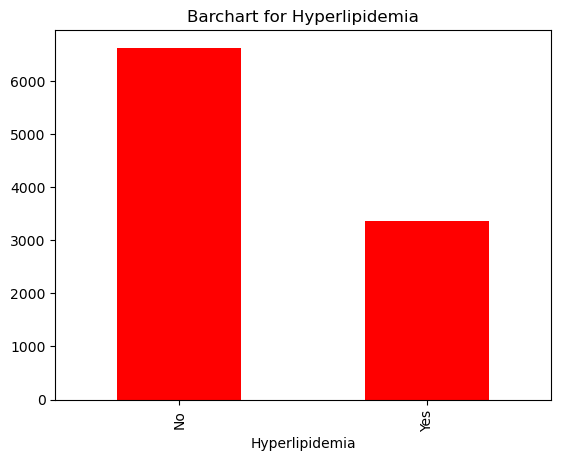

In [41]:
#Barchart for Hyperlipidemia
log_df['Hyperlipidemia'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for Hyperlipidemia")
plt.show()

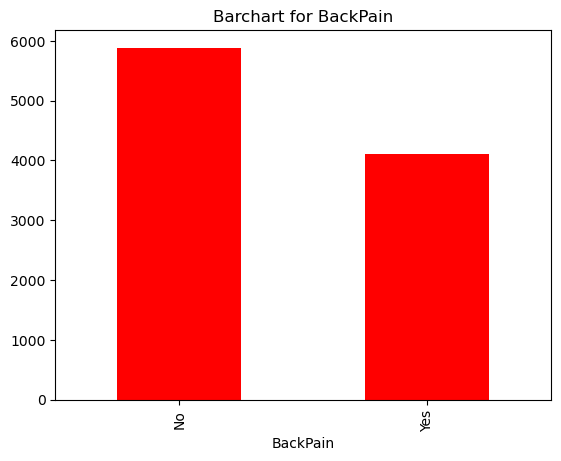

In [42]:
#Barchart for BackPain
log_df['BackPain'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for BackPain")
plt.show()

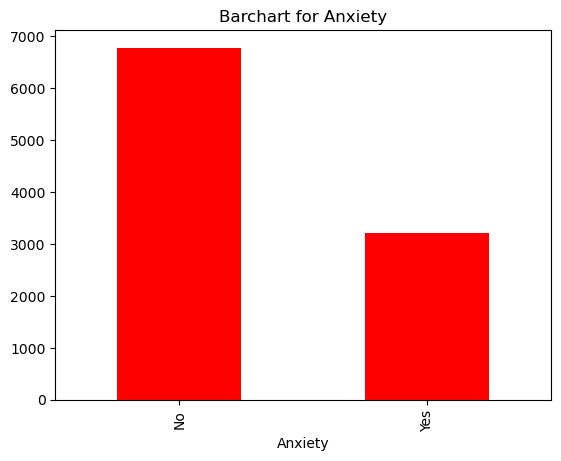

In [43]:
#Barchart for Anxiety
log_df['Anxiety'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for Anxiety")
plt.show()

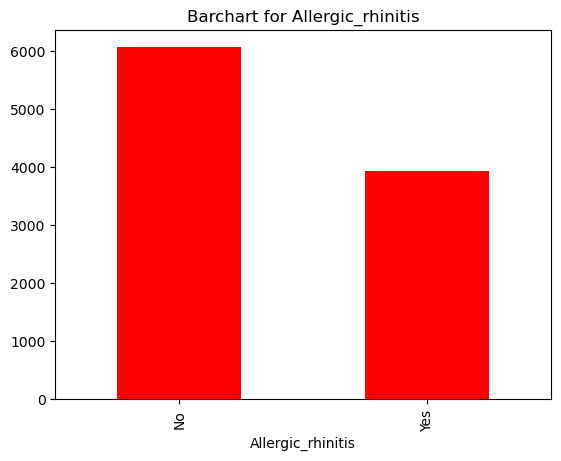

In [44]:
#Barchart for Allergic_rhinitis
log_df['Allergic_rhinitis'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for Allergic_rhinitis")
plt.show()

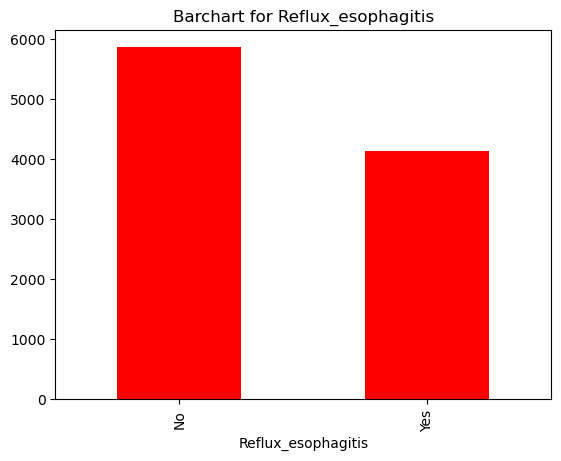

In [45]:
#Barchart for Reflux_esophagitis
log_df['Reflux_esophagitis'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for Reflux_esophagitis")
plt.show()

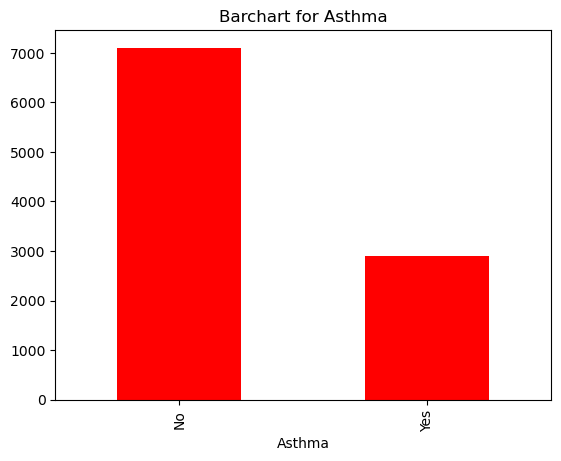

In [46]:
#Barchart for Asthma
log_df['Asthma'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for Asthma")
plt.show()

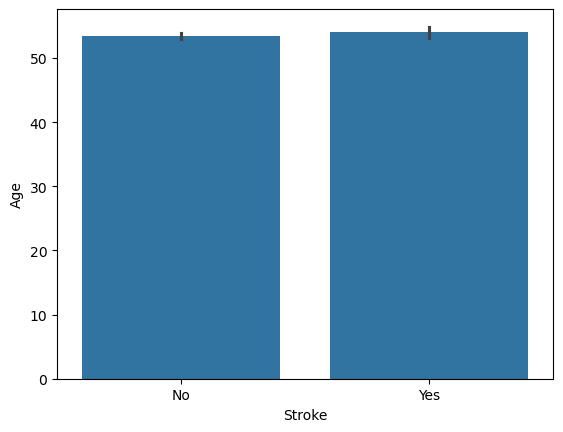

In [47]:
#Bivariate statistics to get an idea of the linear relationships with the target variable
#Barplot between Age and Stroke
sns.barplot(data=log_df, x='Stroke', y='Age')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

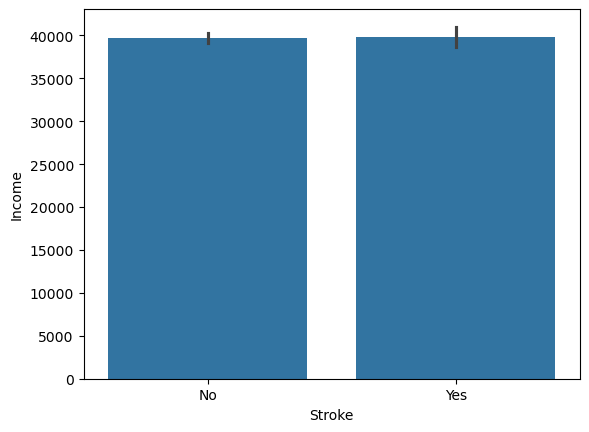

In [48]:
#Scatterplot between Income and Stroke
sns.barplot(data=log_df, x='Stroke', y='Income')
plt.xlabel('Stroke')
plt.ylabel('Income')
plt.show()

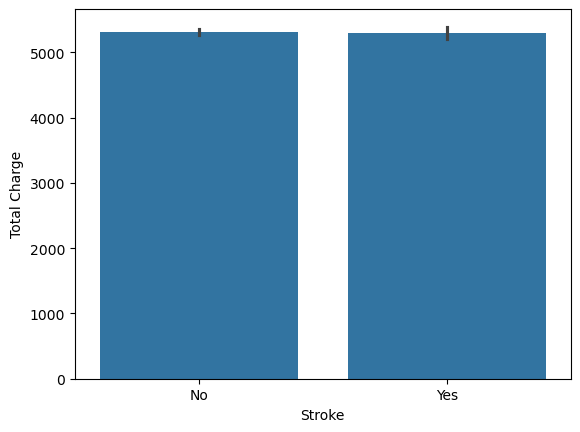

In [49]:

sns.barplot(data=log_df, x='Stroke', y='TotalCharge')
plt.xlabel('Stroke')
plt.ylabel('Total Charge')
plt.show()

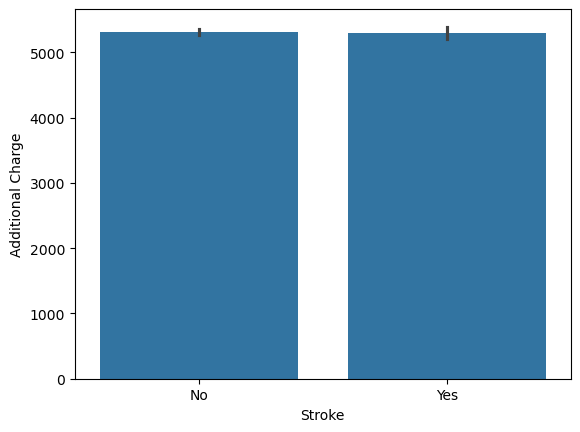

In [50]:

sns.barplot(data=log_df, x='Stroke', y='TotalCharge')
plt.xlabel('Stroke')
plt.ylabel('Additional Charge')
plt.show()

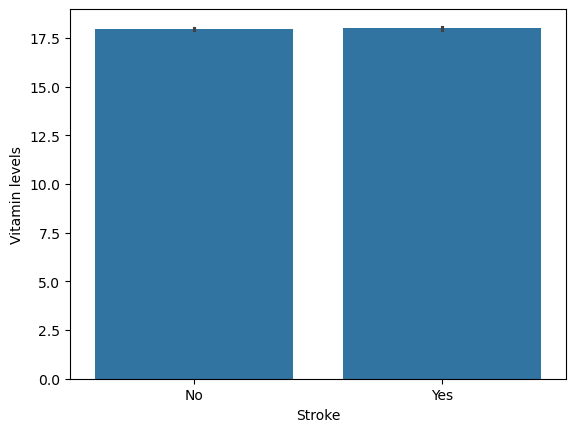

In [51]:

sns.barplot(data=log_df, x='Stroke', y='VitD_levels')
plt.xlabel('Stroke')
plt.ylabel('Vitamin levels')
plt.show()

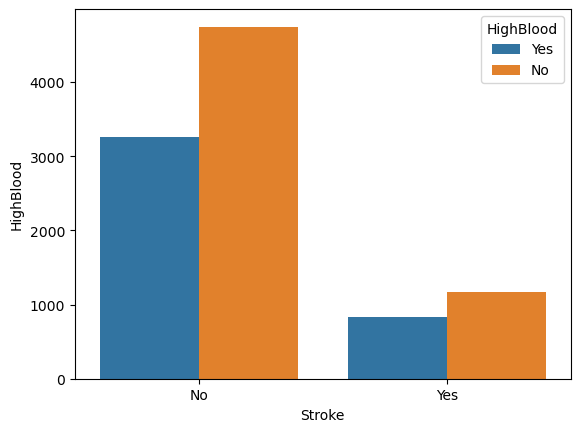

In [52]:
sns.countplot(x='Stroke', hue='HighBlood', data=log_df)
plt.xlabel('Stroke')
plt.ylabel('HighBlood')

# Show the plot
plt.show()

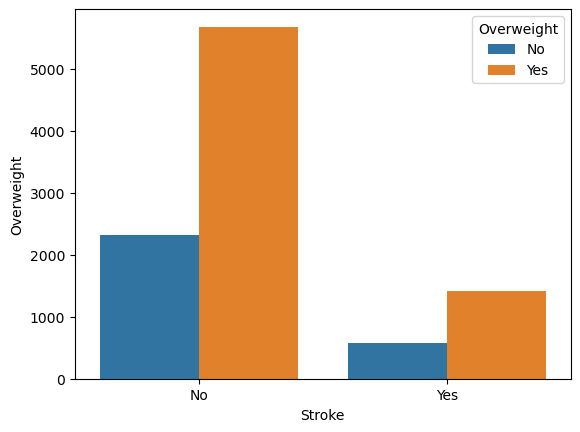

In [53]:
sns.countplot(x='Stroke', hue='Overweight', data=log_df)
plt.xlabel('Stroke')
plt.ylabel('Overweight')

# Show the plot
plt.show()

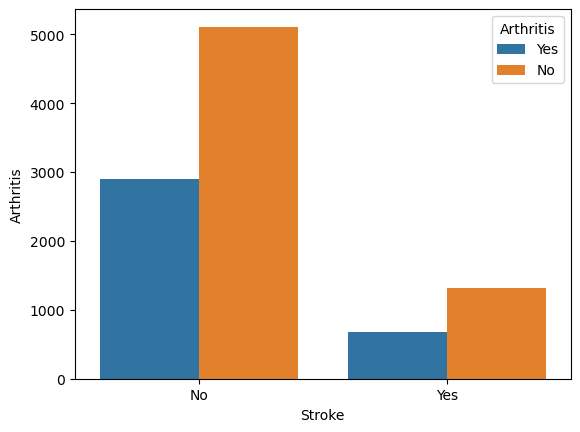

In [54]:
sns.countplot(x='Stroke', hue='Arthritis', data=log_df)
plt.xlabel('Stroke')
plt.ylabel('Arthritis')

# Show the plot
plt.show()

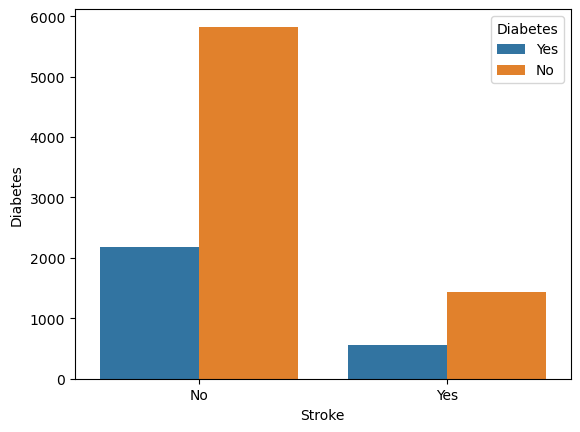

In [55]:
sns.countplot(x='Stroke', hue='Diabetes', data=log_df)
plt.xlabel('Stroke')
plt.ylabel('Diabetes')

# Show the plot
plt.show()

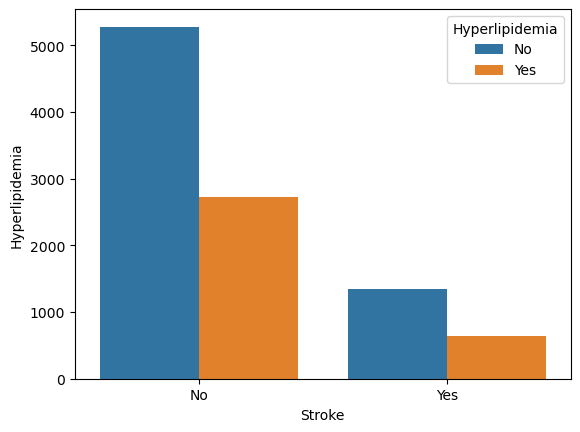

In [56]:
sns.countplot(x='Stroke', hue='Hyperlipidemia', data=log_df)
plt.xlabel('Stroke')
plt.ylabel('Hyperlipidemia')

# Show the plot
plt.show()

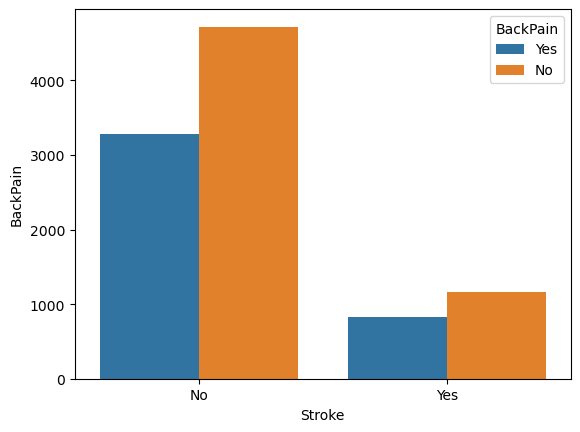

In [57]:
sns.countplot(x='Stroke', hue='BackPain', data=log_df)
plt.xlabel('Stroke')
plt.ylabel('BackPain')

# Show the plot
plt.show()

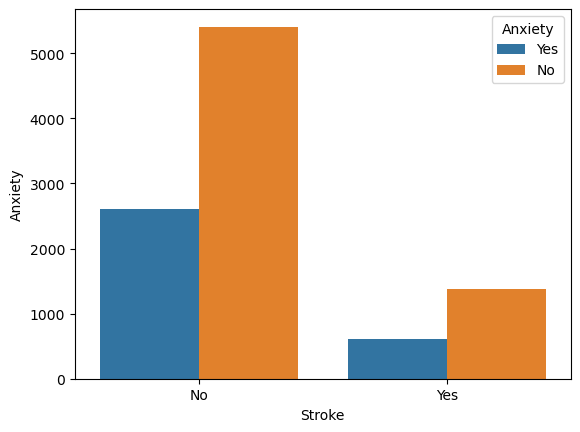

In [58]:
sns.countplot(x='Stroke', hue='Anxiety', data=log_df)
plt.xlabel('Stroke')
plt.ylabel('Anxiety')

# Show the plot
plt.show()

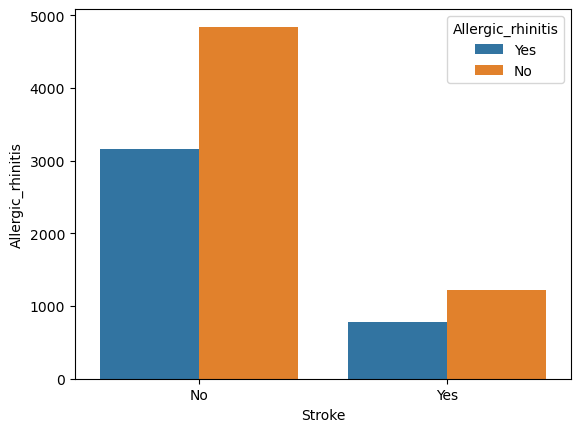

In [59]:
sns.countplot(x='Stroke', hue='Allergic_rhinitis', data=log_df)
plt.xlabel('Stroke')
plt.ylabel('Allergic_rhinitis')

# Show the plot
plt.show()

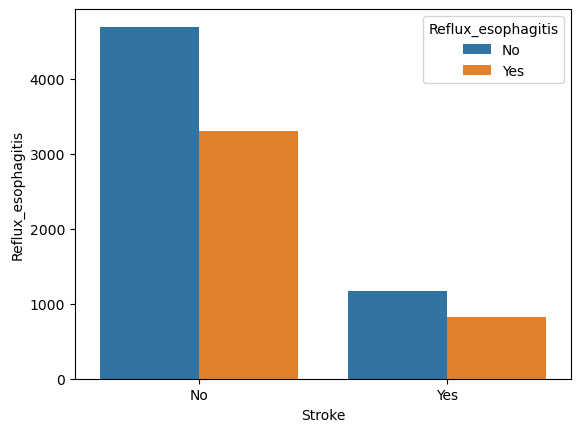

In [60]:
sns.countplot(x='Stroke', hue='Reflux_esophagitis', data=log_df)
plt.xlabel('Stroke')
plt.ylabel('Reflux_esophagitis')

# Show the plot
plt.show()

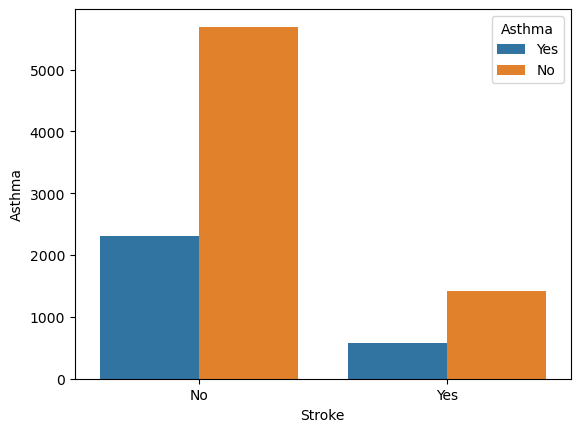

In [61]:
sns.countplot(x='Stroke', hue='Asthma', data=log_df)
plt.xlabel('Stroke')
plt.ylabel('Asthma')

# Show the plot
plt.show()

In [62]:
#categorical variable with more than two categories need to be one - hot encoded
log_df = pd.get_dummies(log_df, columns = ['Gender', 'HighBlood', 'Stroke','Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma'], drop_first = True, dtype=int)

In [63]:
log_df

,Age,Income,VitD_levels,TotalCharge,Additional_charges,Gender_Male,Gender_Nonbinary,HighBlood_Yes,Stroke_Yes,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes
0,53,86575.93,19.14,3726.70,17939.40,1,0,1,0,0,1,1,0,1,1,1,0,1
1,51,46805.99,18.94,4193.19,17613.00,0,0,1,0,1,0,0,0,0,0,0,1,0
2,53,14370.14,18.06,2434.23,17505.19,0,0,1,0,1,0,1,0,0,0,0,0,0
3,78,39741.49,16.58,2127.83,12993.44,1,0,0,1,0,1,0,0,0,0,0,1,1
4,22,1209.56,17.44,2113.07,3716.53,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25,45967.61,16.98,6850.94,8927.64,1,0,1,0,0,0,0,0,0,1,0,1,0
9996,87,14983.02,18.18,7741.69,27086.49,1,0,1,0,1,1,1,0,0,0,0,0,1
9997,45,65917.81,17.13,8276.48,15281.21,0,0,1,0,1,0,0,0,0,1,1,0,0
9998,43,29702.32,19.91,7644.48,7781.68,1,0,0,0,1,0,0,0,1,0,0,0,0


In [64]:
log_df.to_csv('medicalT2_clean.csv', index=False)

In [65]:
df=pd.read_csv('medicalT2_clean.csv')


In [66]:
#check for VIF to see if variables should be eliminated due to high multicolinearity
#Below 5: Considered low correlation between variables, indicating minimal multicollinearity. 
#Between 5 and 10: May indicate moderate correlation, prompting further analysis. 
#Above 10: Suggests high multicollinearity, often requiring adjustments to the model
X = df[['Age', 'Income', 'VitD_levels', 'TotalCharge', 'Additional_charges', 'Gender_Male', 'Gender_Nonbinary', 'HighBlood_Yes', 'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes', 'Asthma_Yes']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                   feature        VIF
0                      Age  69.090180
1                   Income   3.240866
2              VitD_levels  20.135764
3              TotalCharge   6.623560
4       Additional_charges  81.236430
5              Gender_Male   1.930519
6         Gender_Nonbinary   1.043737
7            HighBlood_Yes  13.216263
8           Overweight_Yes   3.369408
9            Arthritis_Yes   1.555346
10            Diabetes_Yes   1.370291
11      Hyperlipidemia_Yes   1.502549
12            BackPain_Yes   1.696636
13             Anxiety_Yes   1.472506
14   Allergic_rhinitis_Yes   1.642827
15  Reflux_esophagitis_Yes   1.695038
16              Asthma_Yes   1.405339


In [67]:
#Eliminating Age, VitD_levels, Additional_charges, HighBlood_yes and rerunning analysis
X = df[['Income', 'TotalCharge', 'Gender_Male', 'Gender_Nonbinary', 'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes', 'Asthma_Yes']]
y=df.Stroke_Yes
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                   feature       VIF
0                   Income  2.841960
1              TotalCharge  4.658503
2              Gender_Male  1.839547
3         Gender_Nonbinary  1.040041
4           Overweight_Yes  2.898246
5            Arthritis_Yes  1.520819
6             Diabetes_Yes  1.348344
7       Hyperlipidemia_Yes  1.469770
8             BackPain_Yes  1.651312
9              Anxiety_Yes  1.441664
10   Allergic_rhinitis_Yes  1.594382
11  Reflux_esophagitis_Yes  1.646688
12              Asthma_Yes  1.377812


In [68]:
X = sm.add_constant(X)

# Fit the initial model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.498988
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Stroke_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0008856
Time:                        09:46:05   Log-Likelihood:                -4989.9
converged:                       True   LL-Null:                       -4994.3
Covariance Type:            nonrobust   LLR p-value:                    0.7845
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.3006      0.102    -12.737      0.000      -1.501      

In [69]:
#Backward Stepwise ELimination #1
#Remove Reflux_esophagitis_yes due to high p-value 0.992
y=df.Stroke_Yes
X = df[['Income', 'TotalCharge', 'Gender_Male', 'Gender_Nonbinary', 'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes','Asthma_Yes']]
X = sm.add_constant(X)
# Fit the initial model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.498988
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Stroke_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0008856
Time:                        09:46:05   Log-Likelihood:                -4989.9
converged:                       True   LL-Null:                       -4994.3
Covariance Type:            nonrobust   LLR p-value:                    0.7161
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.3004      0.100    -12.975      0.000      -1.497      -1.

In [70]:
#Backward Stepwise ELimination #2
#Remove Overweight due to high p-value 0.904
y=df.Stroke_Yes
X = df[['Income', 'TotalCharge', 'Gender_Male', 'Gender_Nonbinary', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes','Asthma_Yes']]
X = sm.add_constant(X)
# Fit the initial model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.498989
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Stroke_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0008841
Time:                        09:46:06   Log-Likelihood:                -4989.9
converged:                       True   LL-Null:                       -4994.3
Covariance Type:            nonrobust   LLR p-value:                    0.6375
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.3053      0.092    -14.241      0.000      -1.485      -1.

In [71]:
#Backward Stepwise ELimination #3
#Remove Asthma due to high p-value 0.829
y=df.Stroke_Yes
X = df[['Income', 'TotalCharge', 'Gender_Male', 'Gender_Nonbinary', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes']]
X = sm.add_constant(X)
# Fit the initial model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.498991
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Stroke_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0008795
Time:                        09:46:06   Log-Likelihood:                -4989.9
converged:                       True   LL-Null:                       -4994.3
Covariance Type:            nonrobust   LLR p-value:                    0.5527
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.3019      0.090    -14.421      0.000      -1.479      -1.

In [72]:
#Backward Stepwise ELimination #4
#Remove Total Charge due to high p-value 0.806
y=df.Stroke_Yes
X = df[['Income', 'Gender_Male', 'Gender_Nonbinary', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes']]
X = sm.add_constant(X)
# Fit the initial model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.498994
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Stroke_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0008734
Time:                        09:46:06   Log-Likelihood:                -4989.9
converged:                       True   LL-Null:                       -4994.3
Covariance Type:            nonrobust   LLR p-value:                    0.4631
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.3163      0.069    -19.195      0.000      -1.451      -1.

In [73]:
#Backward Stepwise ELimination #5
#Remove Income due to high p-value 0.775
y=df.Stroke_Yes
X = df[['Gender_Male', 'Gender_Nonbinary', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes']]
X = sm.add_constant(X)
# Fit the initial model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.498998
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Stroke_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0008653
Time:                        09:46:06   Log-Likelihood:                -4990.0
converged:                       True   LL-Null:                       -4994.3
Covariance Type:            nonrobust   LLR p-value:                    0.3733
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.3054      0.057    -22.920      0.000      -1.417      -1.

In [74]:
#Backward Stepwise ELimination #6
#Remove BackPain due to high p-value 0.083
y=df.Stroke_Yes
X = df[['Gender_Male', 'Gender_Nonbinary', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes']]
X = sm.add_constant(X)
# Fit the initial model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.499004
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Stroke_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0008541
Time:                        09:46:06   Log-Likelihood:                -4990.0
converged:                       True   LL-Null:                       -4994.3
Covariance Type:            nonrobust   LLR p-value:                    0.2881
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.2982      0.053    -24.636      0.000      -1.401      -1.

In [75]:
#Backward Stepwise ELimination #7
#Remove Gender_Male due to high p-value 0.706
y=df.Stroke_Yes
X = df[['Gender_Nonbinary', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes']]
X = sm.add_constant(X)
# Fit the initial model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.499011
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Stroke_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0008399
Time:                        09:46:06   Log-Likelihood:                -4990.1
converged:                       True   LL-Null:                       -4994.3
Covariance Type:            nonrobust   LLR p-value:                    0.2110
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.3074      0.047    -27.941      0.000      -1.399      -1.

In [76]:
#Backward Stepwise ELimination #8
#Remove Gender_Nonbinary due to high p-value 0.650
y=df.Stroke_Yes
X = df[['Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes']]
X = sm.add_constant(X)
# Fit the initial model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.499021
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Stroke_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0008196
Time:                        09:46:06   Log-Likelihood:                -4990.2
converged:                       True   LL-Null:                       -4994.3
Covariance Type:            nonrobust   LLR p-value:                    0.1462
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.3059      0.047    -27.982      0.000      -1.397      -1.

In [77]:
#Backward Stepwise ELimination #9
#Remove Allergic_rhinitis_Yes  due to high p-value 0.125
y=df.Stroke_Yes
X = df[['Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'Anxiety_Yes']]
X = sm.add_constant(X)
# Fit the initial model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.499033
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Stroke_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0007966
Time:                        09:46:06   Log-Likelihood:                -4990.3
converged:                       True   LL-Null:                       -4994.3
Covariance Type:            nonrobust   LLR p-value:                   0.09316
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3154      0.042    -31.168      0.000      -1.398      -1.233
Arthr

In [78]:
#Backward Stepwise ELimination #10
#Remove Anxiety  due to high p-value 0.180
y=df.Stroke_Yes
X = df[['Arthritis_Yes','Diabetes_Yes', 'Hyperlipidemia_Yes']]
X = sm.add_constant(X)
# Fit the initial model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.499128
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Stroke_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0006057
Time:                        09:46:06   Log-Likelihood:                -4991.3
converged:                       True   LL-Null:                       -4994.3
Covariance Type:            nonrobust   LLR p-value:                    0.1092
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3391      0.039    -34.639      0.000      -1.415      -1.263
Arthr

In [79]:
#Backward Stepwise ELimination #11
#Remove diabetes
y=df.Stroke_Yes
X = df[['Arthritis_Yes', 'Hyperlipidemia_Yes']]
X = sm.add_constant(X)
# Fit the initial model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.499147
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Stroke_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0005682
Time:                        09:46:06   Log-Likelihood:                -4991.5
converged:                       True   LL-Null:                       -4994.3
Covariance Type:            nonrobust   LLR p-value:                   0.05856
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3299      0.036    -37.395      0.000      -1.400      -1.260
Arthr

In [80]:
#Backward Stepwise ELimination #12
#Remove diabetes
y=df.Stroke_Yes
X = df[['Arthritis_Yes']]
X = sm.add_constant(X)
# Fit the initial model
final_model = sm.Logit(y, X).fit()
print(final_model.summary())

Optimization terminated successfully.
         Current function value: 0.499260
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Stroke_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0003423
Time:                        09:46:07   Log-Likelihood:                -4992.6
converged:                       True   LL-Null:                       -4994.3
Covariance Type:            nonrobust   LLR p-value:                   0.06444
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.3566      0.031    -43.885      0.000      -1.417      -1.296
Arthritis_Yes    -0.

I decided to retain Arthritis_Yes even though based on the p-value is not considered significant, the variable has practical and clinical significance. 

In [82]:
exp_Arthritis_Y = round(np.exp(0.0972),4)
print(exp_Arthritis_Y )

1.1021


In [83]:
#Given odds ration for Arthritis_Yes,change in odds for patient with stroke
print(f"Given odds ration for Arthritis_Yes,change in odds for patient with stroke {round((exp_Arthritis_Y-1)*100,4)}")

Given odds ration for Arthritis_Yes,change in odds for patient with stroke 10.21


In [84]:
# Make predictions using the fitted model
y_pred = final_model.predict(X)

# Generate confusion matrix
cm = confusion_matrix(y, y_pred.round())  # Round predictions to get binary outcome (0 or 1)

# Display confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[8007    0]
 [1993    0]]
